In [94]:
import sqlite3
from sqlite3 import Error
import csv
import pandas as pd
SHOW = True

In [95]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [96]:
df1 = df[['ID','Start_Time','Severity','Start_Lat','Start_Lng','Zipcode','City','State','Weather_Condition','Temperature(F)','Humidity(%)','Visibility(mi)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']]
df1['Zipcode'] = df1['Zipcode'].str.slice(stop=5).astype(float)
df1['City'] = df1['City'] .astype(str)
df1['State'] = df1['State'] .astype(str)
df1['Start_Time']= pd.to_datetime(df['Start_Time'])
a = {'Night' : 1,'Day' : 0}
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].map(a)
df1

<ipython-input-96-4de1409f13b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Zipcode'] = df1['Zipcode'].str.slice(stop=5).astype(float)
<ipython-input-96-4de1409f13b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City'] = df1['City'] .astype(str)
<ipython-input-96-4de1409f13b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,City,State,Weather_Condition,Temperature(F),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,Dublin,OH,Light Rain,42.1,...,False,False,False,False,False,False,False,False,False,1.0
1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,Dayton,OH,Light Rain,36.9,...,False,False,False,False,False,False,False,False,False,1.0
2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,Cincinnati,OH,Overcast,36.0,...,True,False,False,False,False,False,False,False,False,1.0
3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,Cincinnati,OH,Overcast,36.0,...,True,False,False,False,False,False,False,False,False,1.0
4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,Akron,OH,Overcast,39.0,...,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2019-08-23 18:03:25,2,34.00248,-117.37936,92501.0,Riverside,CA,Fair,86.0,...,False,False,False,False,False,False,False,False,False,0.0
1516060,A-4239403,2019-08-23 19:11:30,2,32.76696,-117.14806,92108.0,San Diego,CA,Fair,70.0,...,False,False,False,False,False,False,False,False,False,0.0
1516061,A-4239404,2019-08-23 19:00:21,2,33.77545,-117.84779,92866.0,Orange,CA,Partly Cloudy,73.0,...,True,False,False,False,False,False,False,False,False,0.0
1516062,A-4239405,2019-08-23 19:00:21,2,33.99246,-118.40302,90230.0,Culver City,CA,Fair,71.0,...,False,False,False,False,False,False,False,False,False,0.0


In [97]:
dataTypeSeries = df1.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
ID                           object
Start_Time           datetime64[ns]
Severity                      int64
Start_Lat                   float64
Start_Lng                   float64
Zipcode                     float64
City                         object
State                        object
Weather_Condition            object
Temperature(F)              float64
Humidity(%)                 float64
Visibility(mi)              float64
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                       bool
No_Exit                        bool
Railway                        bool
Roundabout                     bool
Station                        bool
Stop                           bool
Traffic_Calming                bool
Traffic_Signal                 bool
Turning_Loop                   bool
Sunrise_Sunset              float64
dtype: object


,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,...,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#missing values
missing_values_percent_per_col = (df1.isna().sum().sort_values(ascending = False) / len(df1)) * 100
missing_values_percent_per_col

Humidity(%)          3.001786
Visibility(mi)       2.916170
Weather_Condition    2.902714
Temperature(F)       2.838469
Zipcode              0.061673
Sunrise_Sunset       0.005475
Junction             0.000000
Turning_Loop         0.000000
Traffic_Signal       0.000000
Traffic_Calming      0.000000
Stop                 0.000000
Station              0.000000
Roundabout           0.000000
Railway              0.000000
No_Exit              0.000000
ID                   0.000000
Give_Way             0.000000
Crossing             0.000000
Start_Time           0.000000
Amenity              0.000000
State                0.000000
City                 0.000000
Start_Lng            0.000000
Start_Lat            0.000000
Severity             0.000000
Bump                 0.000000
dtype: float64

In [100]:
#missing value total percentage
df2 = df1.dropna()
missing_percent = (1- len(df2)/len(df1))*100
missing_percent

3.7789961373662306

In [101]:
df2.describe()

,Severity,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Sunrise_Sunset
count,1.458772e+06,1.458772e+06,1.458772e+06,1.458772e+06,1.458772e+06,1.458772e+06,1.458772e+06,1.458772e+06
mean,2.238243e+00,3.690391e+01,-9.864941e+01,6.122019e+04,5.961326e+01,6.465779e+01,9.128612e+00,3.970346e-01
std,6.082804e-01,5.184712e+00,1.848482e+01,3.145580e+04,1.826100e+01,2.325729e+01,2.855219e+00,4.892835e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,1.001000e+03,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385080e+01,-1.182197e+02,3.231100e+04,4.800000e+01,4.800000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,3.733576e+01,-9.435768e+01,6.813800e+04,6.100000e+01,6.800000e+01,1.000000e+01,0.000000e+00
75%,2.000000e+00,4.074058e+01,-8.093029e+01,9.233500e+04,7.300000e+01,8.400000e+01,1.000000e+01,1.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,9.940100e+04,1.706000e+02,1.000000e+02,1.400000e+02,1.000000e+00


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#overall correlation exploration
df3 = df2.loc[:,['Severity','Start_Time','Zipcode','Temperature(F)','Humidity(%)','Visibility(mi)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']]
corr = df3.corr(method = 'pearson')
corr

,Severity,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
Severity,1.000000,-0.150314,-0.014638,0.047559,0.005823,0.002561,-0.002536,-0.054392,0.007346,0.022054,-0.001223,-0.003958,-0.000600,-0.011273,-0.000391,0.000645,-0.043402,NaN,-0.010345
Zipcode,-0.150314,1.000000,0.044148,-0.192872,0.015105,-0.014152,0.009600,-0.023846,-0.020332,0.007588,-0.003513,0.015533,-0.002654,-0.017263,0.034412,0.002283,-0.073935,NaN,0.000411
Temperature(F),-0.014638,0.044148,1.000000,-0.387662,0.188335,0.005001,0.000901,0.063051,-0.001606,0.021991,0.010939,0.003566,0.003300,0.039893,-0.009153,0.001147,0.083064,NaN,-0.341891
Humidity(%),0.047559,-0.192872,-0.387662,1.000000,-0.355460,-0.003534,-0.004528,-0.054270,0.001444,0.002501,-0.009733,-0.000538,0.002784,-0.002937,-0.008311,-0.003033,-0.056353,NaN,0.303859
Visibility(mi),0.005823,0.015105,0.188335,-0.355460,1.000000,0.005262,0.002251,0.033272,0.003876,-0.000961,0.009328,0.001520,0.000180,0.012910,0.001988,0.002319,0.035202,NaN,-0.046775
Amenity,0.002561,-0.014152,0.005001,-0.003534,0.005262,1.000000,0.005143,0.106999,0.003744,-0.025961,0.012763,0.041522,0.000753,0.132523,0.024864,0.011553,0.096988,NaN,-0.004049
Bump,-0.002536,0.009600,0.000901,-0.004528,0.002251,0.005143,1.000000,0.008282,-0.000611,0.002809,0.004108,0.007392,-0.000078,0.005143,0.012087,0.737313,-0.002100,NaN,0.002942
Crossing,-0.054392,-0.023846,0.063051,-0.054270,0.033272,0.106999,0.008282,1.000000,0.059541,-0.085191,0.039508,0.230677,0.000027,0.123360,0.056566,0.021125,0.468176,NaN,-0.024143
Give_Way,0.007346,-0.020332,-0.001606,0.001444,0.003876,0.003744,-0.000611,0.059541,1.000000,-0.007314,0.003215,0.001044,-0.000273,-0.001115,0.053141,0.000830,0.054783,NaN,-0.001458
Junction,0.022054,0.007588,0.021991,0.002501,-0.000961,-0.025961,0.002809,-0.085191,-0.007314,1.000000,-0.000991,-0.012621,0.009529,-0.039330,-0.031693,0.003197,-0.130104,NaN,-0.026954


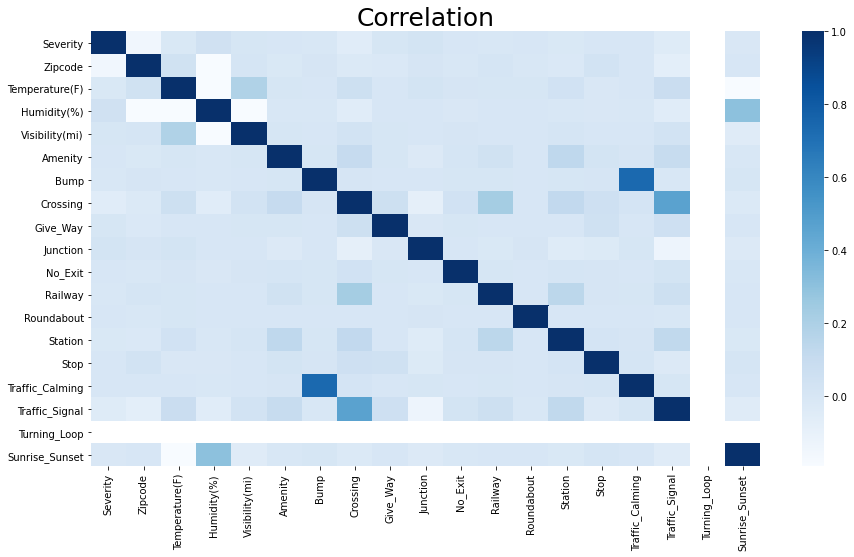

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,robust = True,cmap = "Blues")
plt.title('Correlation', fontsize = 25)
plt.show()

In [126]:
#check the bool variables
none_zero_pct = df3[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']].sum().sort_values(ascending = False)/len(df3) *100
none_zero_pct
#suggesting drop those below 5%. It is highly likely there's no correlation between that variable and severity

Sunrise_Sunset     39.703463
Junction           13.521030
Traffic_Signal     11.302794
Crossing            5.777736
Station             1.836339
Stop                1.166255
Railway             0.825146
Amenity             0.815618
Give_Way            0.213056
No_Exit             0.116536
Traffic_Calming     0.032150
Bump                0.017480
Roundabout          0.003496
Turning_Loop        0.000000
dtype: float64

In [130]:
#distribution in each city and state
cities = df2.City.unique()
state = df2.State.unique()
cities_by_accidents = df2.City.value_counts()
state_by_accidents = df2.State.value_counts()

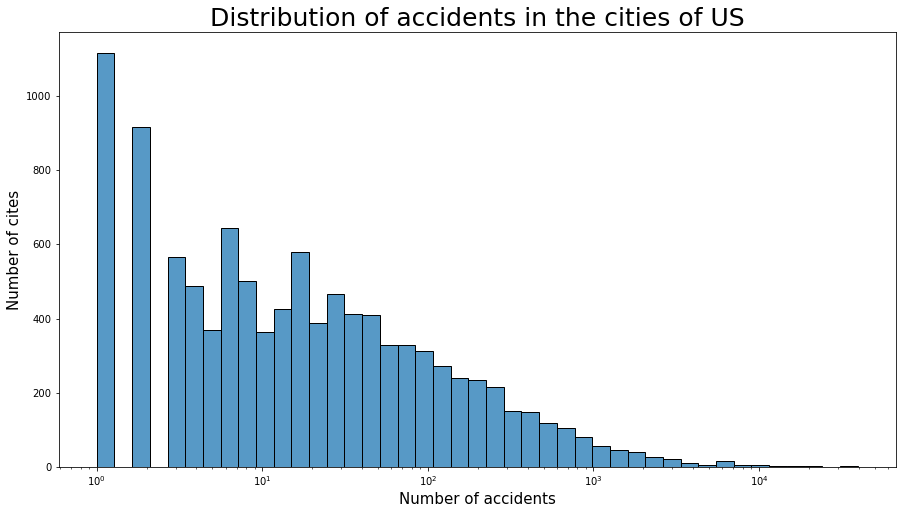

In [128]:
#plot the distribution of accidents
plt.figure(figsize=(15,8))
sns.histplot(cities_by_accidents, log_scale = True)
plt.xlabel('Number of accidents', fontsize=15)
plt.ylabel('Number of cites', fontsize=15)
plt.title('Distribution of accidents in the cities of US', fontsize = 25)
plt.show()
## Question: more than 1000 cities have less than 10 accidents throughout the years

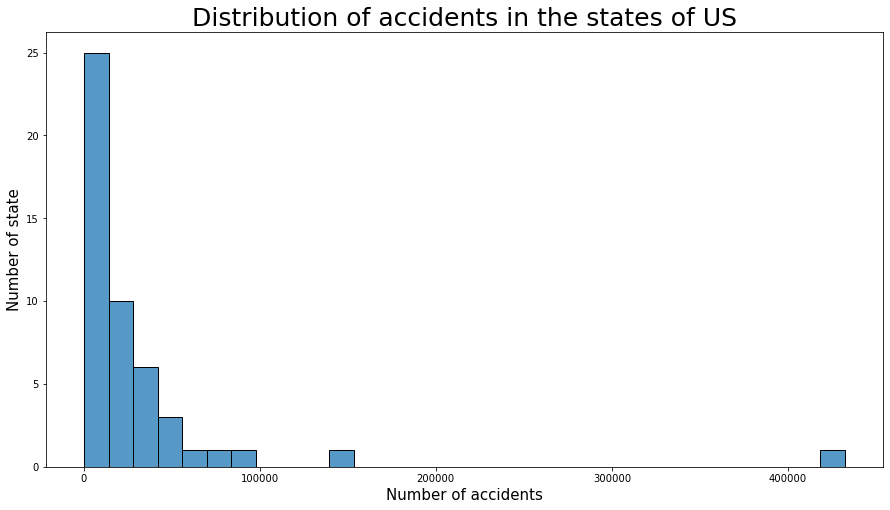

In [34]:
plt.figure(figsize=(15,8))
sns.histplot(state_by_accidents)
plt.xlabel('Number of accidents', fontsize=15)
plt.ylabel('Number of state', fontsize=15)
plt.title('Distribution of accidents in the states of US', fontsize = 25)
plt.show()

In [150]:
# Top 20 most traffic accidents city (we can use our clustering algorithm in those cities)
cities_by_accidents[:20]

Los Angeles       39416
Miami             34600
Charlotte         22120
Houston           20538
Dallas            19317
Sacramento        18329
Orlando           15975
Portland          14772
San Diego         13798
Minneapolis       12625
Atlanta           11797
Chicago           11478
Saint Paul         9865
Phoenix            9820
Raleigh            9465
San Jose           9290
Nashville          8332
Riverside          8109
Richmond           7970
Salt Lake City     7710
Name: City, dtype: int64

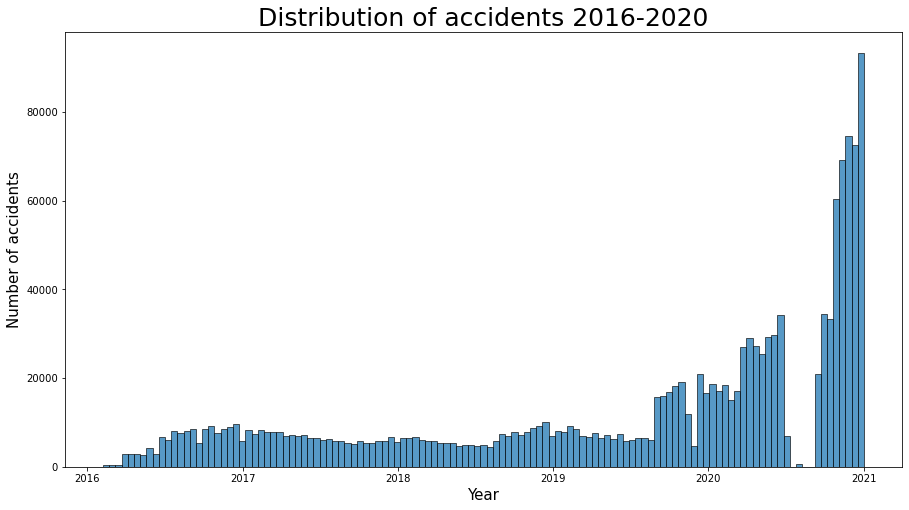

In [38]:
#time exploration
start_time = pd.to_datetime(df2['Start_Time'])
plt.figure(figsize=(15,8))
sns.histplot(start_time)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Distribution of accidents 2016-2020', fontsize = 25)
plt.show()

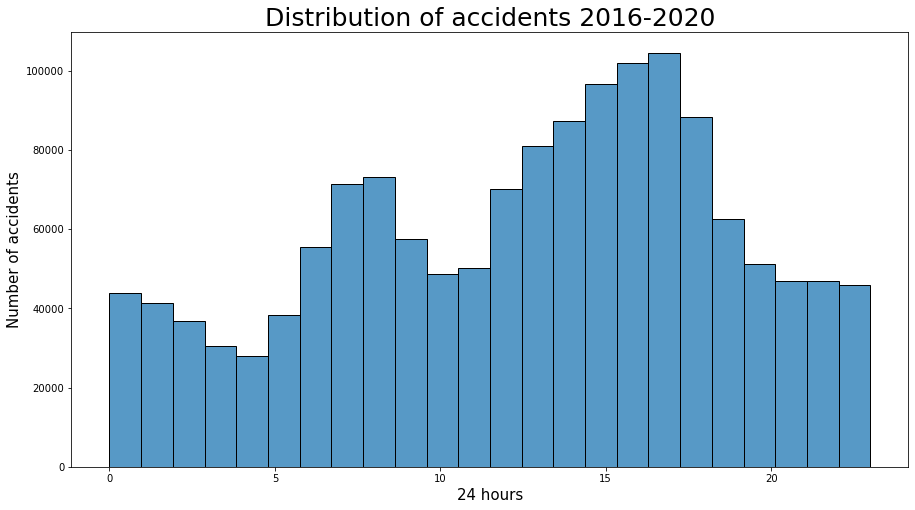

In [40]:
#accidents over 24 hrs
plt.figure(figsize=(15,8))
sns.histplot(start_time.dt.hour,bins=24)
plt.xlabel('24 hours', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Distribution of accidents over 24hrs', fontsize = 25)
plt.show()

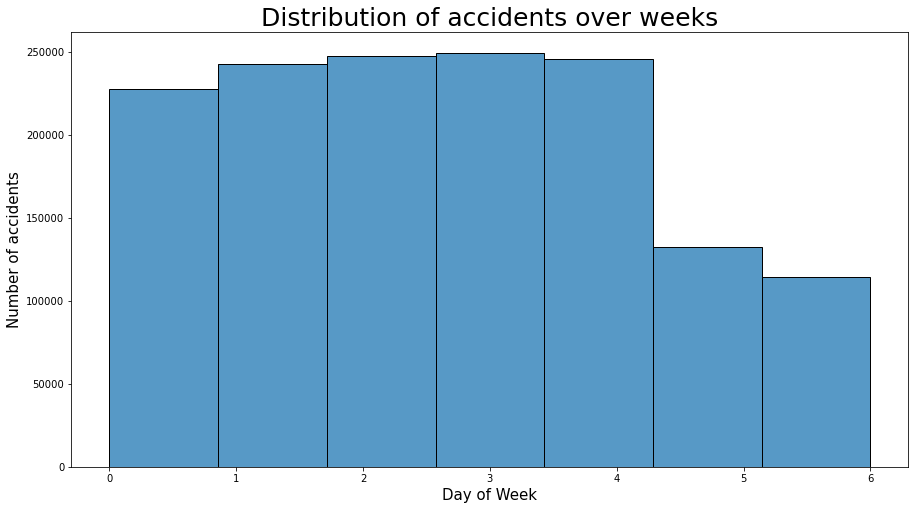

In [41]:
#accidents over weeks
plt.figure(figsize=(15,8))
sns.histplot(start_time.dt.dayofweek,bins=7)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Distribution of accidents over weeks', fontsize = 25)
plt.show()

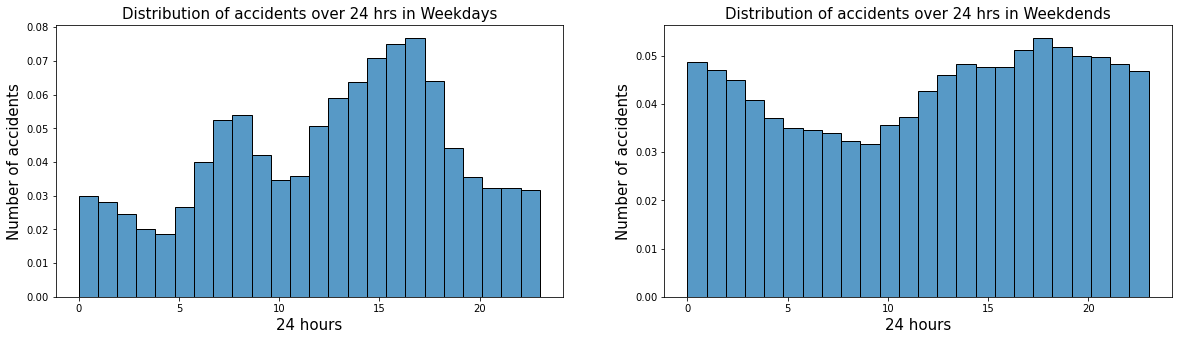

In [45]:
#weekdays vs weekends
weekdays = start_time[start_time.dt.dayofweek <=5]
weekends = start_time[start_time.dt.dayofweek >5]

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(data = weekdays.dt.hour,bins = 24,stat = 'density')
plt.xlabel('24 hours', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Distribution of accidents over 24 hrs in Weekdays', fontsize = 15)

plt.subplot(1, 2,2)
sns.histplot(data = weekends.dt.hour,bins = 24,stat = 'density')
plt.xlabel('24 hours', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Distribution of accidents over 24 hrs in Weekdends', fontsize = 15)

plt.show()

In [163]:
#exploring for the weather
weather = pd.DataFrame(df2['Weather_Condition'], columns = ['Weather_Condition'])
one_hot = pd.get_dummies(weather['Weather_Condition'])
one_hot

,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,...,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
weather_pct = one_hot.sum().sort_values(ascending = False)/len(one_hot) *100
weather_pct[:15]
# only 6 condition showed more than 5%. 

Fair                31.576422
Mostly Cloudy       13.187050
Clear               12.250509
Cloudy              10.949621
Partly Cloudy        9.046102
Overcast             5.965223
Light Rain           4.932779
Scattered Clouds     3.203174
Light Snow           1.506678
Fog                  1.335575
Haze                 1.195937
Rain                 1.177909
Fair / Windy         0.447225
Heavy Rain           0.415144
Light Drizzle        0.291409
dtype: float64

In [169]:
#Choosing the top 15 to do the correlation
common_weather = one_hot[['Fair','Mostly Cloudy','Clear','Cloudy','Partly Cloudy','Overcast','Light Rain','Scattered Clouds','Light Snow','Fog','Haze','Rain','Fair / Windy','Heavy Rain','Light Drizzle']]
common_weather = df2[['Severity']].join(common_weather)
corr2 = common_weather.corr(method = 'pearson')
corr2
#counter intuitively, the clear and overcast weather are positively correlated with severity.
#Need more attention on this result when conducting the regression

,Severity,Fair,Mostly Cloudy,Clear,Cloudy,Partly Cloudy,Overcast,Light Rain,Scattered Clouds,Light Snow,Fog,Haze,Rain,Fair / Windy,Heavy Rain,Light Drizzle
Severity,1.000000,-0.148328,0.007482,0.135590,-0.049410,-0.000853,0.107706,0.005051,0.059506,0.024503,-0.014448,-0.015244,-0.001721,-0.013365,-0.000505,0.008911
Fair,-0.148328,1.000000,-0.264765,-0.253824,-0.238210,-0.214239,-0.171099,-0.154742,-0.123577,-0.084021,-0.079037,-0.074739,-0.074166,-0.045532,-0.043861,-0.036725
Mostly Cloudy,0.007482,-0.264765,1.000000,-0.145625,-0.136667,-0.122914,-0.098164,-0.088779,-0.070899,-0.048205,-0.045346,-0.042879,-0.042551,-0.026123,-0.025164,-0.021070
Clear,0.135590,-0.253824,-0.145625,1.000000,-0.131020,-0.117835,-0.094107,-0.085111,-0.067970,-0.046213,-0.043472,-0.041108,-0.040793,-0.025043,-0.024124,-0.020199
Cloudy,-0.049410,-0.238210,-0.136667,-0.131020,1.000000,-0.110586,-0.088318,-0.079875,-0.063788,-0.043370,-0.040798,-0.038579,-0.038283,-0.023503,-0.022640,-0.018957
Partly Cloudy,-0.000853,-0.214239,-0.122914,-0.117835,-0.110586,1.000000,-0.079431,-0.071837,-0.057369,-0.039006,-0.036692,-0.034697,-0.034431,-0.021138,-0.020362,-0.017049
Overcast,0.107706,-0.171099,-0.098164,-0.094107,-0.088318,-0.079431,1.000000,-0.057372,-0.045817,-0.031151,-0.029304,-0.027710,-0.027498,-0.016881,-0.016262,-0.013616
Light Rain,0.005051,-0.154742,-0.088779,-0.085111,-0.079875,-0.071837,-0.057372,1.000000,-0.041437,-0.028173,-0.026502,-0.025061,-0.024869,-0.015267,-0.014707,-0.012314
Scattered Clouds,0.059506,-0.123577,-0.070899,-0.067970,-0.063788,-0.057369,-0.045817,-0.041437,1.000000,-0.022499,-0.021165,-0.020014,-0.019860,-0.012193,-0.011745,-0.009834
Light Snow,0.024503,-0.084021,-0.048205,-0.046213,-0.043370,-0.039006,-0.031151,-0.028173,-0.022499,1.000000,-0.014390,-0.013607,-0.013503,-0.008290,-0.007986,-0.006686
